In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
PATH = r"C:\Git\Mushroom\MushroomDataset\secondary_data.csv"
data = pd.read_csv(PATH, sep=';')
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [4]:
#We replace the values of the target class from "p" and "e" to "1" and "0" for covenience.
data['class'].replace({"p": 1, "e": 0 }, inplace = True)

In [120]:
data.shape

(61069, 21)

### Dealing with null-values

We will drop features with around 10000 null-values of more, corresponding to roughly 1/6 of the database entries. 

In [5]:
data.isnull().sum().sort_values(ascending=False)

veil-type               57892
spore-print-color       54715
veil-color              53656
stem-root               51538
stem-surface            38124
gill-spacing            25063
cap-surface             14120
gill-attachment          9884
ring-type                2471
class                       0
stem-color                  0
habitat                     0
has-ring                    0
stem-width                  0
cap-diameter                0
stem-height                 0
gill-color                  0
does-bruise-or-bleed        0
cap-color                   0
cap-shape                   0
season                      0
dtype: int64

We drop the first eight features of the previous list

In [5]:
#Columns to drop
columns_drop=data.isnull().sum().sort_values(ascending=False)[:8].index.tolist()

In [6]:
data.drop(columns = columns_drop, inplace = True)

In order to deal with the null-values in the ring-type feature, lets first study some plots associated to it

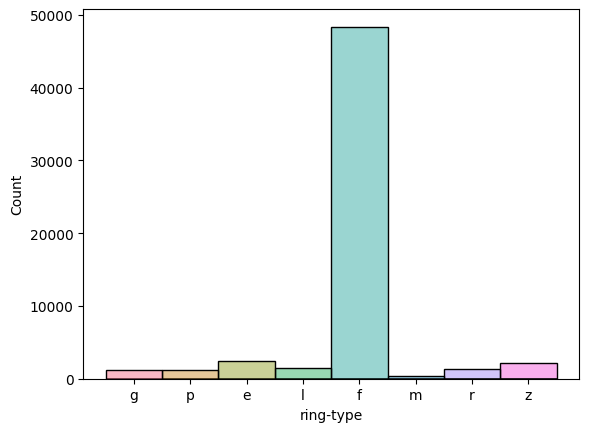

In [8]:
sns.set_palette('Spectral')
ax=sns.histplot(data, x='ring-type', hue = 'ring-type')
ax.legend_.remove()
plt.show()

From the previous plot we see that most samples have ring-type equal to f-type.

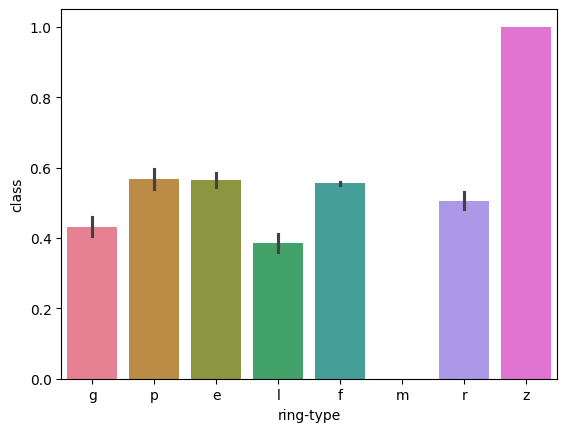

In [9]:
ax=sns.barplot(data, x='ring-type', y='class', hue='ring-type')
ax.legend_.remove()
plt.show()

Furthermore, the previous plot shows that the f ring-type does not distinguishes that well between poisonous and edible mushrooms, so we do not lose that much by setting ring-type equal to f for the missing values in ring type. 

In [7]:
data['ring-type'].fillna(value = 'f', inplace = True)

We double check that we have no more null values

In [11]:
print('Remaining null values: ', data.isnull().sum().sum())

Remaining null values:  0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  int64  
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  ring-type             61069 non-null  object 
 11  habitat               61069 non-null  object 
 12  season                61069 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 6.1+ MB


### Checking whether the target is balanced

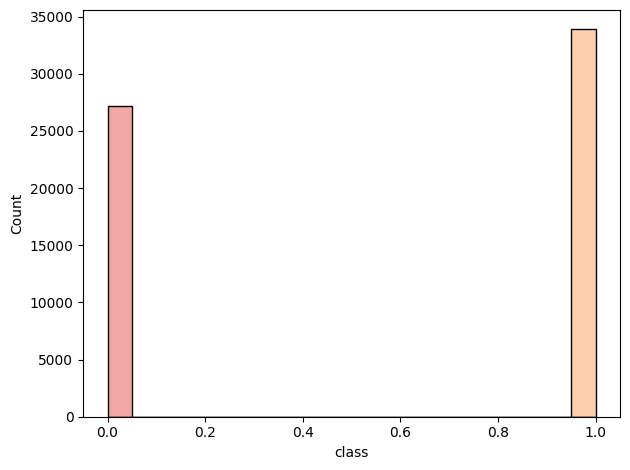

In [13]:
ax=sns.histplot(data, x='class', hue='class')
ax.legend_.remove()
plt.tight_layout()
plt.show()

We see that both classes are more or less balanced.

## Numerical features

We now study the relation between the numerical features and the target, in order to determine if they are able to distinguish between being edible or poisonous.

In [8]:
#Numerical features
num_cols = data.select_dtypes(include = 'number').columns 

In [9]:
data2=data.copy()
data2['class']=data2['class'].replace({1:'Poisonous', 0: 'Edible'})

In [16]:
data2.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


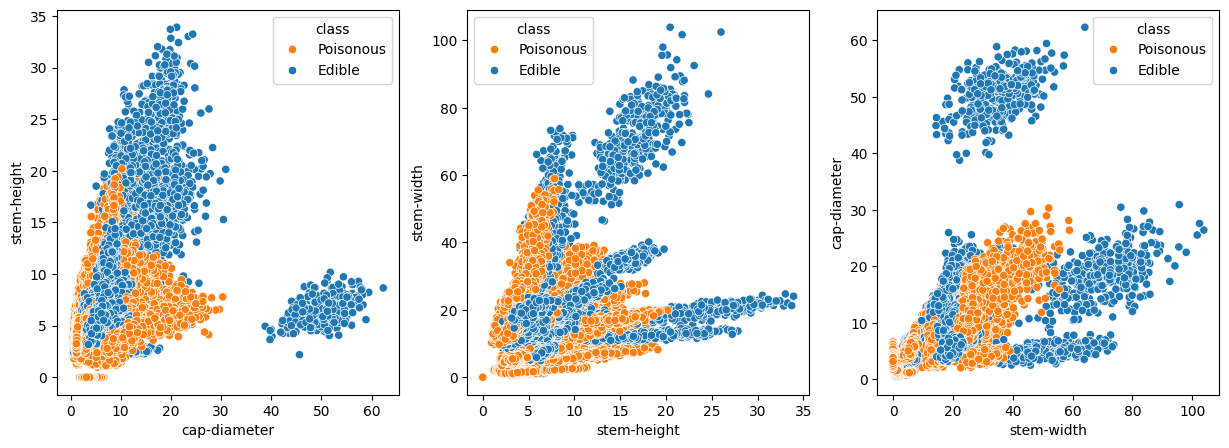

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(data2, x='cap-diameter', y='stem-height', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.subplot(1,3,2)
sns.scatterplot(data2, x='stem-height', y='stem-width', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.subplot(1,3,3)
sns.scatterplot(data2, x='stem-width', y='cap-diameter', hue ='class', palette={"Edible": "#1f77b4", "Poisonous": "#ff7f0e"})
plt.show()

From the previous plots we see that poisonous mushrooms tend to have smaller stem height, stem width, and cap diameter; compared to certain edible mushrooms. Hence may use these features to distinguish between poisonous and edible mushrooms.  

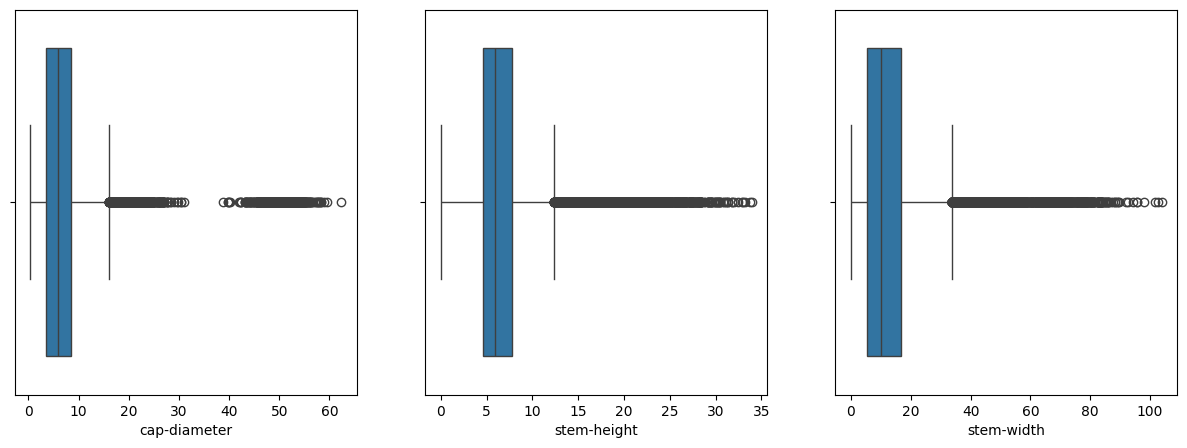

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data2, x='cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.boxplot(data2, x='stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.boxplot(data2, x='stem-width', color="#1f77b4")
plt.show()

From the boxplots we also se the presence of ourliers in all numerical features.

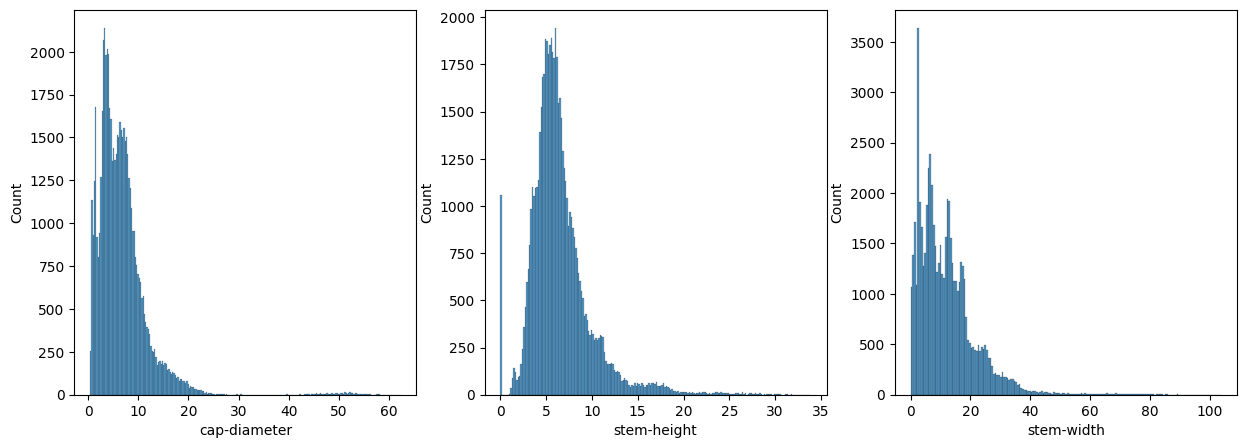

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data2, x='cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.histplot(data2, x='stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.histplot(data2, x='stem-width', color="#1f77b4")
plt.show()

We also see that their distributions skewed rather than normal. We will apply a log transform to make them more normal-distributed. This will help the performance of distance based models that we will use in the future. 

In [10]:
num_cols = num_cols.tolist()

In [11]:
num_cols.remove('class')

In [12]:
for col in num_cols:
    data2[col]=data2[col].apply(lambda x: np.log(x+1))
    data2.rename({col: 'Log-'+col}, axis=1, inplace = True)

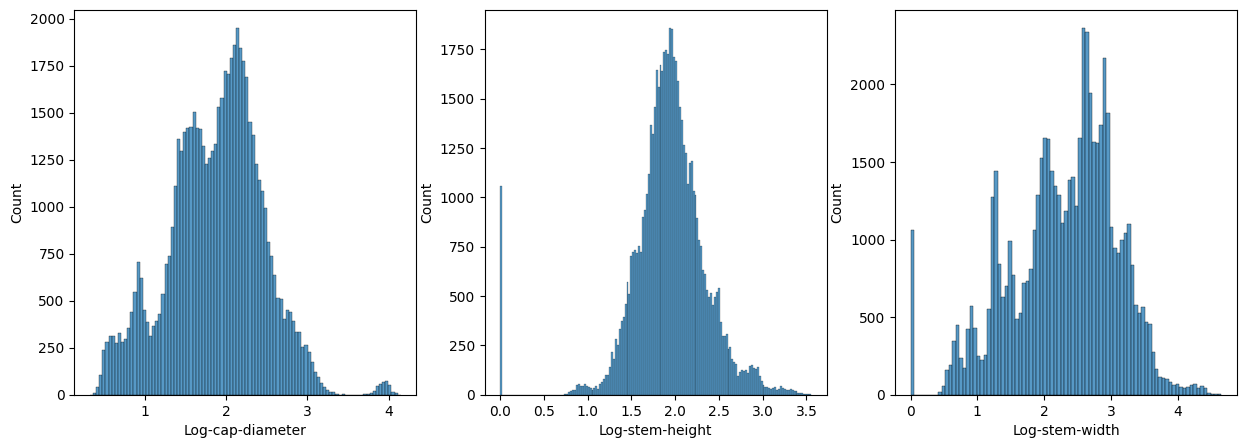

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data2, x='Log-cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.histplot(data2, x='Log-stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.histplot(data2, x='Log-stem-width', color="#1f77b4")
plt.show()

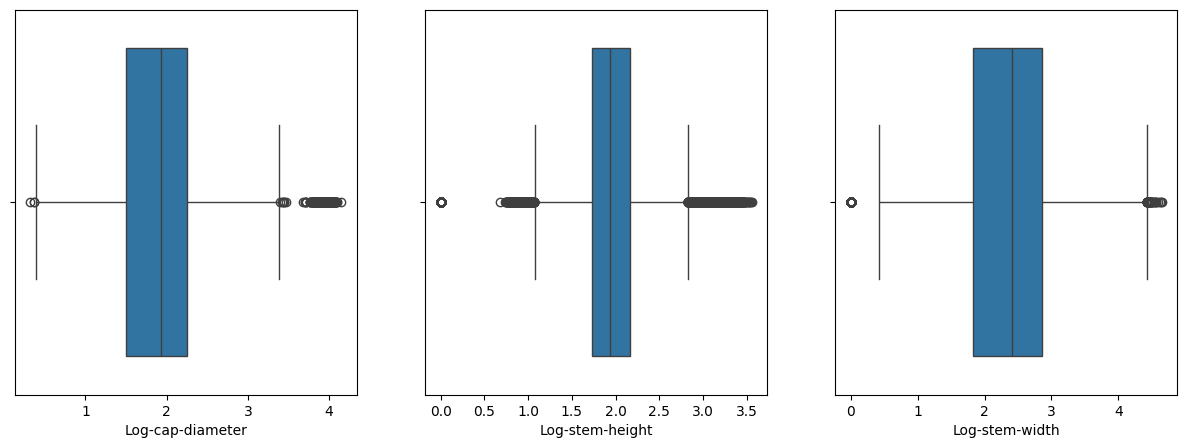

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data2, x='Log-cap-diameter', color="#1f77b4")
plt.subplot(1,3,2)
sns.boxplot(data2, x='Log-stem-height', color="#1f77b4")
plt.subplot(1,3,3)
sns.boxplot(data2, x='Log-stem-width', color="#1f77b4")
plt.show()

We see that the numerical features are more normally distributed now

### Study of categorical features

In [13]:
cat_cols = data2.select_dtypes(include = 'object').columns
cat_cols= cat_cols.tolist()

In [14]:
cat_cols.remove('class')

In [15]:
data3=data2.copy()

In [16]:
data3['class'].replace({'Poisonous': 1, 'Edible': 0}, inplace=True)

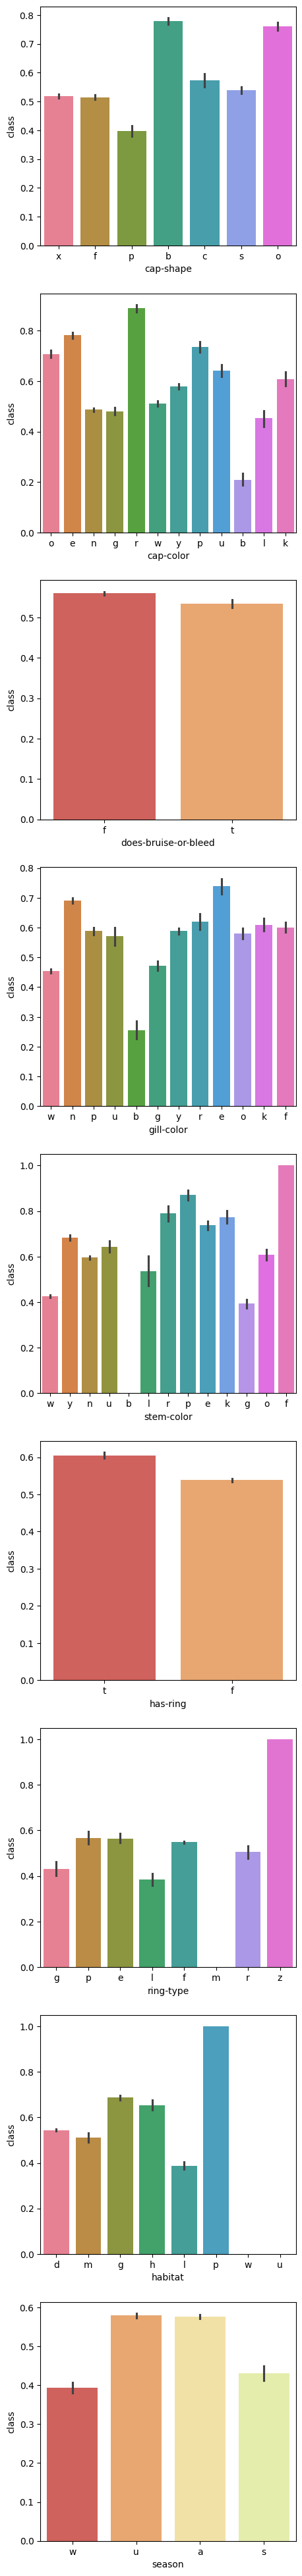

In [29]:
plt.figure(figsize=(5,50))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1, i+1)
    sns.barplot(data3, x=col, y='class', hue=col)
plt.show()

From the previous graphs we see that:
- Mushrooms with bell (b) cap-shapes or "other" (o) tend to be more poisonous on average.
- Mushrooms with cap colors of green (r), red (e), pink (p) or orange (o) tends to be more poisonous on average, while those with buff (b) color tend to be edible. 
- Mushrooms with gill-color of brown (n) or red (e) are usually more poisonous, while those with buff (b) color tend to be edible. 
- Mushrooms with a stem-color with no stem color (f)... (complete)
- Mushrooms in the summer (u) and autumn (a) seasons tend to be more poisonous than those in winter and spring 

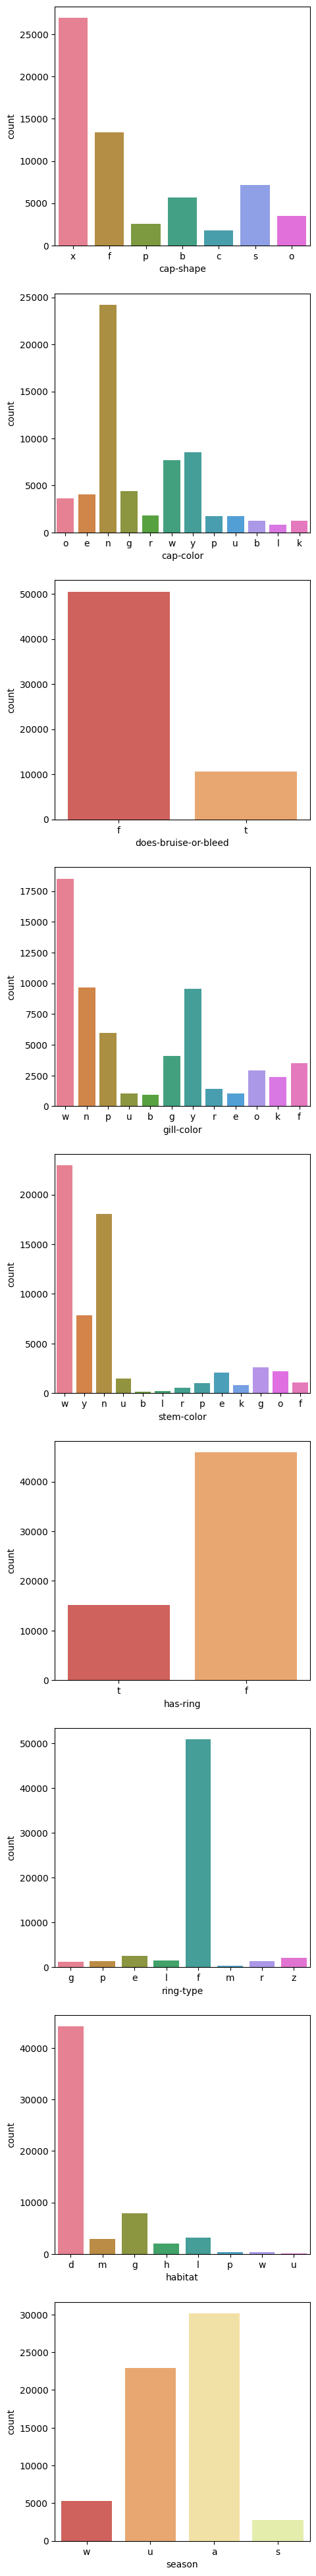

In [30]:
plt.figure(figsize=(5,50))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols),1, i+1)
    sns.countplot(data3, x=col, hue=col)
plt.show()

We see that many values of the features are unbalanced. We could try grouping some of their values together, but we will continue with the values as they are for now. 

### Train and test sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dataf=pd.get_dummies(data3)

In [19]:
X=dataf.iloc[:,1:]
y=dataf['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import recall_score

In [22]:
ss=StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [26]:
param_grid = {'C': [0.01,0.1,1]}
model = SVC(kernel='rbf')

In [25]:
model.fit(X_train_ss, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
grid = GridSearchCV(model, param_grid=param_grid, scoring='recall', cv=5, verbose = 3)
grid.fit(X_train_ss,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ............................C=0.01;, score=0.852 total time= 4.8min
[CV 2/5] END ............................C=0.01;, score=0.854 total time= 4.8min
[CV 3/5] END ............................C=0.01;, score=0.853 total time= 4.8min
[CV 4/5] END ............................C=0.01;, score=0.861 total time= 4.9min
[CV 5/5] END ............................C=0.01;, score=0.839 total time= 4.9min
[CV 1/5] END .............................C=0.1;, score=0.918 total time= 3.2min
[CV 2/5] END .............................C=0.1;, score=0.926 total time= 2.5min
[CV 3/5] END .............................C=0.1;, score=0.921 total time= 2.5min
[CV 4/5] END .............................C=0.1;, score=0.929 total time= 2.4min
[CV 5/5] END .............................C=0.1;, score=0.914 total time= 2.5min
[CV 1/5] END ...............................C=1;, score=0.967 total time= 1.1min
[CV 2/5] END ...............................C=1;,

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.1, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [28]:
import pickle

In [29]:
svm = grid.best_estimator_
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)
y_pred = svm.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.9681321923871349


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {"n_estimators": [200 ,300, 400], "max_features": ['sqrt', 'log2']}

rf = RandomForestClassifier()

grid_rf = GridSearchCV(rf, param_grid = rf_params, scoring = 'recall', cv = 3, verbose =3)

In [31]:
grid_rf.fit(X_train_ss, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END max_features=sqrt, n_estimators=200;, score=0.997 total time=  16.0s
[CV 2/3] END max_features=sqrt, n_estimators=200;, score=0.997 total time=  12.4s
[CV 3/3] END max_features=sqrt, n_estimators=200;, score=0.998 total time=  12.2s
[CV 1/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  17.2s
[CV 2/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  16.6s
[CV 3/3] END max_features=sqrt, n_estimators=300;, score=0.997 total time=  16.4s
[CV 1/3] END max_features=sqrt, n_estimators=400;, score=0.997 total time=  22.5s
[CV 2/3] END max_features=sqrt, n_estimators=400;, score=0.997 total time=  21.2s
[CV 3/3] END max_features=sqrt, n_estimators=400;, score=0.997 total time=  21.2s
[CV 1/3] END max_features=log2, n_estimators=200;, score=0.997 total time=  10.2s
[CV 2/3] END max_features=log2, n_estimators=200;, score=0.997 total time=   9.2s
[CV 3/3] END max_features=log2, n_esti

,estimator,RandomForestClassifier()
,param_grid,"{'max_features': ['sqrt', 'log2'], 'n_estimators': [200, 300, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [32]:
rf_model = grid_rf.best_estimator_
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)
y_pred = rf_model.predict(X_test_ss)
print("Recall score:", recall_score(y_test, y_pred))

Recall score: 0.9968525622110751
